# Text Bag of Words with Naive Bayes

## Chris Tralie


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
def get_counts(strings):
    """
    Count all word occurrences
    
    Parameters
    ----------
    strings: list of string
        A list of strings
    """
    probs = {}
    total = 0
    for s in strings:
        for word in s.split():
            if not word in probs:
                probs[word] = 0
            probs[word] += 1
            total += 1
    return (probs, total)

def estimate_log_prob_params(strings):
    """
    Estimate the log multinomial probability parameters
    
    Parameters
    ----------
    strings: list of string
        A list of strings
    """
    probs = {}
    total = 0
    for s in strings:
        for word in s.split():
            if not word in probs:
                probs[word] = 1 # Do this for smoothing
                total += 1
            probs[word] += 1
            total += 1
    # Convert to log probabilities
    for word in probs:
        probs[word] = np.log(probs[word]/total)
    return (probs, total)

def get_log_probability_words(model, words):
    """
    Compute the log probability of a set of words using
    a model
    
    Parameters
    ----------
    model: (prob, total)
        prob: dict
            word->log probability in model
        total: int
            Total number of words in the model, plus smoothing
    words: list of string
        Words to which to apply the model
    """
    (prob, total) = model
    res = 0
    for word in words:
        if not word in prob:
            res += np.log(1/total)
        else:
            res += prob[word]
    return res

# 2016 Presidential Debates

First, we load the first two debates and use them to build two different bag of words models: one for Trump and one for Clinton.  Below is some code that uses lists so we don't have to repeat the same code too much


In [3]:
categories = ["clinton", "trump"]
models = []
for c in categories:
    fin = open("text/2016Debates/{}1.txt".format(c))
    strings = [fin.read()]
    fin.close()
    fin = open("text/2016Debates/{}2.txt".format(c))
    strings.append(fin.read())
    fin.close()
    model = estimate_log_prob_params(strings)
    models.append(model)

Next, we apply the models to each example in the third debate, and we get nearly perfect accuracy!  In the process, we construct something called a "confusion matrix," where the row is the true class of the example we're classifying, and the columns count how often they were classified as another class.  The more elements along the diagonal, the better

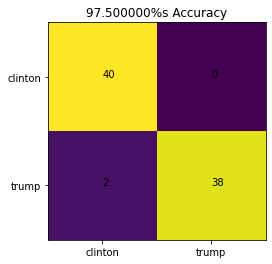

In [4]:
# Apply test data
confusion = np.zeros((2, 2), dtype=int)
for i, c in enumerate(categories):
    for f in glob.glob("text/2016Debates/{}3*.txt".format(c)):
        fin = open(f)
        test = fin.read()
        words = test.split()
        log_probs = [get_log_probability_words(models[j], words) for j in range(len(categories))]
        j = np.argmax(log_probs)
        confusion[i, j] += 1
        fin.close()
#print(confusion, ":", np.sum(np.diag(confusion))/np.sum(confusion), "accuracy")

plt.imshow(confusion)
for i in range(len(confusion)):
    for j in range(len(confusion)):
        plt.text(j, i, confusion[i, j])
plt.xticks(np.arange(len(confusion)), categories)
plt.yticks(np.arange(len(confusion)), categories)
plt.title("{:f}%s Accuracy".format(100*np.sum(np.diag(confusion))/np.sum(confusion)));